A simple ConvNet to detect is your friend is smiling or not.

data URL: https://www.kaggle.com/iarunava/happy-house-dataset#train_happy.h5

In [1]:
import keras
from keras.models import Model
from keras.layers import Input, Dense, Activation, BatchNormalization, Flatten, Conv2D, MaxPooling2D
import matplotlib
import h5py
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline


matplotlib.rcParams['axes.grid'] = True

Using TensorFlow backend.


# load training and test data 

In [2]:
def load_dataset(folder_path):
    train_dataset = h5py.File(os.path.join(folder_path, 'train_happy.h5'))
    test_dataset = h5py.File(os.path.join(folder_path, 'test_happy.h5'))
    
    print_var_names(train_dataset)
    print_var_names(test_dataset)
    print_class_names(train_dataset)
    
    X_train, y_train = get_X_y(train_dataset)
    X_test, y_test = get_X_y(test_dataset)
    
    return X_train, y_train, X_test, y_test
    
def print_var_names(h5_var):
    print('Variables in training dataset: {}'.format(list(h5_var.keys())))
    
def print_class_names(h5_var):
    print('Classes: {}'.format(np.array(h5_var['list_classes'])))
                       
def get_X_y(dataset):
    keys = list(dataset.keys())
    X = np.array(dataset[keys[1]])
    y = np.array(dataset[keys[2]])
    
    return X, y

In [3]:
X_train, y_train, X_test, y_test = load_dataset('data/happy-house-dataset/')

Variables in training dataset: ['list_classes', 'train_set_x', 'train_set_y']
Variables in training dataset: ['list_classes', 'test_set_x', 'test_set_y']
Classes: [0 1]


In [4]:
def prep_data(X_train, y_train, X_test, y_test):
    X_train = X_train/255
    X_test = X_test/255
    y_train = y_train.reshape((-1, 1))
    y_test = y_test.reshape((-1, 1))
    
    return X_train, y_train, X_test, y_test

In [5]:
X_train, y_train, X_test, y_test = prep_data(X_train, y_train, X_test, y_test)

# Visualize image

In [6]:
def show_image(idx):
    plt.imshow(X_train[idx])
    title_mapping = {0: 'Not smiling', 1: 'Smiling'}
    label = str(y_train[idx, 0])
    plt.grid(False)
    plt.title('{}: {}'.format(label, title_mapping[int(label)]))

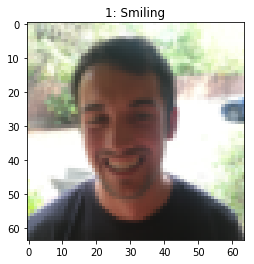

In [7]:
show_image(12)

# Modeling 

In [8]:
def happy_model(input_shape):
    # input
    X_input = Input(input_shape)
    
    # convolution
    X = Conv2D(32, (5, 5), strides=(1, 1), padding='same', name='conv0')(X_input)
    X = BatchNormalization(axis=-1, name='bn0')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2, 2), name='max_pool')(X)
    
    # fully connected
    X = Flatten()(X)
    X = Dense(1, activation='sigmoid', name='fc')(X)
    
    # model
    model = Model(inputs=X_input, outputs=X, name='happy model')
    
    return model

In [9]:
model = happy_model(X_train.shape[1:])

model.summary()

model.compile('adam', loss='binary_crossentropy', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
conv0 (Conv2D)               (None, 64, 64, 32)        2432      
_________________________________________________________________
bn0 (BatchNormalization)     (None, 64, 64, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 64, 64, 32)        0         
_________________________________________________________________
max_pool (MaxPooling2D)      (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32768)             0         
_________________________________________________________________
fc (Dense)                   (None, 1)                 32769     
Total para

In [10]:
history  = model.fit(X_train, y_train, epochs=40, batch_size=128, validation_split=0.1)

Train on 540 samples, validate on 60 samples
Epoch 1/40
540/540 [==============================] - 1s 2ms/step - loss: 2.7714 - acc: 0.4870 - val_loss: 1.8620 - val_acc: 0.4833
Epoch 2/40
540/540 [==============================] - 0s 249us/step - loss: 1.2252 - acc: 0.5981 - val_loss: 0.7371 - val_acc: 0.6833
Epoch 3/40
540/540 [==============================] - 0s 219us/step - loss: 0.6959 - acc: 0.7167 - val_loss: 0.5501 - val_acc: 0.8000
Epoch 4/40
540/540 [==============================] - 0s 221us/step - loss: 0.4615 - acc: 0.8222 - val_loss: 0.5281 - val_acc: 0.7667
Epoch 5/40
540/540 [==============================] - 0s 240us/step - loss: 0.3009 - acc: 0.8907 - val_loss: 0.1522 - val_acc: 0.9500
Epoch 6/40
540/540 [==============================] - 0s 242us/step - loss: 0.2537 - acc: 0.8963 - val_loss: 0.1561 - val_acc: 0.9167
Epoch 7/40
540/540 [==============================] - 0s 217us/step - loss: 0.2104 - acc: 0.9000 - val_loss: 0.5223 - val_acc: 0.7500
Epoch 8/40
540/540 

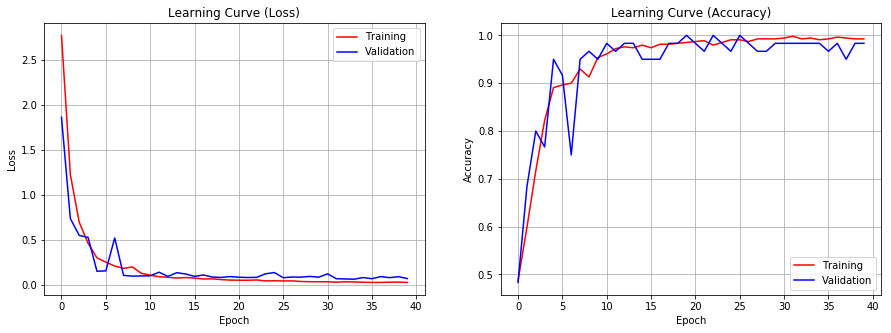

In [11]:
def plot_learning_curve(history):
    epoch = history.epoch
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    ax[0].plot(epoch, loss, color='red', label='Training')
    ax[0].plot(epoch, val_loss, color='blue', label='Validation')
    ax[0].set_title('Learning Curve (Loss)')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylabel('Loss')
    ax[0].legend()
    
    ax[1].plot(epoch, acc, color='red', label='Training')
    ax[1].plot(epoch, val_acc, color='blue', label='Validation')
    ax[1].set_title('Learning Curve (Accuracy)')
    ax[1].set_xlabel('Epoch')
    ax[1].set_ylabel('Accuracy')
    ax[1].legend()

plot_learning_curve(history)

# Evaluation 

In [12]:
evaluation = model.evaluate(X_test, y_test, verbose=1)

prob_test = model.predict(X_test, verbose=1)

pred_test = (prob_test > 0.5).astype(np.int)

print('Test loss: {}'.format(evaluation[0]))
print('Test accuracy: {}'.format(evaluation[1]))

150/150 [==============================] - 0s 286us/step
Test loss: 0.11144299467404684
Test accuracy: 0.9666666706403096


# Visualize prediction

In [13]:
def show_test(X_test, y_test, pred_test):
    n = 5
    choice = np.random.choice(X_test.shape[0], n, replace=False)
    fig, ax = plt.subplots(1, n, figsize=(20, 4))
    for idx, ax_i in enumerate(ax):
        ax_i.imshow(X_test[choice[idx]])
        true = str(y_test[choice[idx], 0])
        pred = str(pred_test[choice[idx], 0])
        ax_i.set_title('True is {} and prediction is {}'.format(true, pred))
        ax_i.grid(False)

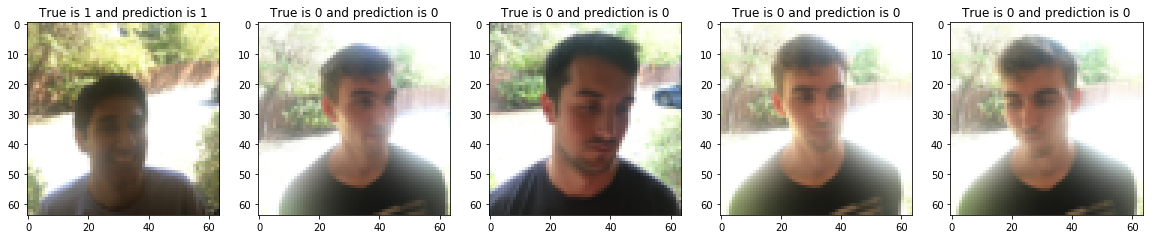

In [14]:
show_test(X_test, y_test, pred_test)